In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\lenovo\Downloads\Virtual Internship 2020\ANZ Virtual Internship\ANZ_synthesised_transaction_dataset_raw.csv")

In [3]:
df.head(3)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             12043 non-null  object 
 1   card_present_flag  7717 non-null   float64
 2   bpay_biller_code   885 non-null    object 
 3   account            12043 non-null  object 
 4   currency           12043 non-null  object 
 5   long_lat           12043 non-null  object 
 6   txn_description    12043 non-null  object 
 7   merchant_id        7717 non-null   object 
 8   merchant_code      883 non-null    float64
 9   first_name         12043 non-null  object 
 10  balance            12043 non-null  float64
 11  date               12043 non-null  object 
 12  gender             12043 non-null  object 
 13  age                12043 non-null  int64  
 14  merchant_suburb    7717 non-null   object 
 15  merchant_state     7717 non-null   object 
 16  extraction         120

In [9]:
df.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [10]:
## Check total number of null values in dataframe
df.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

# Data Manipulation

In [11]:
## This is data set of 100 customers.
df['account'].value_counts()

ACC-1598451071    578
ACC-1222300524    303
ACC-182446574     292
ACC-4258502723    260
ACC-1037050564    259
                 ... 
ACC-1998563091     40
ACC-3881031190     37
ACC-721712940      34
ACC-4059612845     31
ACC-1217063613     25
Name: account, Length: 100, dtype: int64

### Add month_number, week_day & hour column in df using date & extraction column

In [12]:
df["Month"] = df["date"].str[3:5]
df["Month"] = df["Month"].astype('int32')

df['day'] = pd.DatetimeIndex(df['date']).day_name() 

df['Hour'] = df['extraction'].str[11:13]
df['Hour'] = pd.to_numeric(df["Hour"])

### Create longitude & latitude columns and plot in a graph

In [13]:
df["longitude"] = df["long_lat"].str[:6]
df["latitude"] = df["long_lat"].str[8:]
df.head(3)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,transaction_id,country,customer_id,merchant_long_lat,movement,Month,day,Hour,longitude,latitude
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,8,Monday,1,153.41,27.95
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,8,Monday,1,153.41,27.95
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,8,Monday,1,151.23,33.94


In [45]:
## Make column numeric
df['longitude'] = pd.to_numeric(df["longitude"])  
df['latitude'] = pd.to_numeric(df["latitude"])  

In [11]:
import os
##Save in excel format i.e xlsx
df.to_csv('ANZ_dataset.csv')

### Find different category in categorical variables

In [12]:
cols1 =['status','card_present_flag','txn_description','gender','merchant_state','country','currency','movement','Month']

for i in cols1:
    print('\nUnique values at column:-',i)
    print(df[i].value_counts())
    print('----------------------------------')


Unique values at column:- status
authorized    7717
posted        4326
Name: status, dtype: int64
----------------------------------

Unique values at column:- card_present_flag
1.0    6194
0.0    1523
Name: card_present_flag, dtype: int64
----------------------------------

Unique values at column:- txn_description
SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64
----------------------------------

Unique values at column:- gender
M    6285
F    5758
Name: gender, dtype: int64
----------------------------------

Unique values at column:- merchant_state
NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64
----------------------------------

Unique values at column:- country
Australia    12043
Name: country, dtype: int64
----------------------------------

Unique values at column:- currency
AUD    12043
Name: 

#### Fill missing value in card_present_flage column by its mode value

In [13]:
## Find mode of card_present_flag column to fill misssing value
df['card_present_flag'].mode()

0    1.0
dtype: float64

In [14]:
## Fill missing values with mode
df['card_present_flag'].fillna(df['card_present_flag'].median(), inplace=True)

## Now, check missing values in column
df.card_present_flag.isnull().sum()

0

## Data Aggregation

### Customers total salary in 3 months

In [24]:
result = df[df['txn_description'] == 'PAY/SALARY'].groupby('account')['amount'].sum()
result.head()

account
ACC-1037050564    11597.17
ACC-1056639002    19170.06
ACC-1199531521    26500.46
ACC-1217063613     9727.24
ACC-1222300524    13027.69
Name: amount, dtype: float64

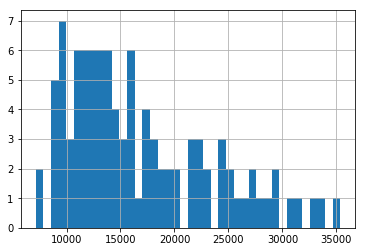

In [42]:
## Graph of salary distribution
result.hist(bins=40)
plt.xlabels('Salary Distribution')
plt.show()

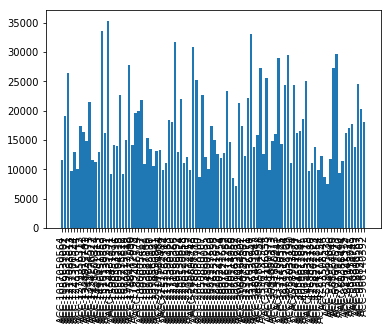

In [36]:
acc_grp = df.groupby('account')
##quantity_ordered = product_group.sum()['Quantity Ordered']

accounts = [product for product, df in acc_grp]
plt.bar(accounts, result)
plt.xticks(rotation = 'vertical')
plt.show()

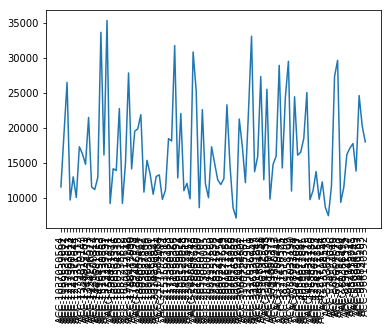

In [39]:
acc_grp = df.groupby('account')
##quantity_ordered = product_group.sum()['Quantity Ordered']

accounts = [product for product, df in acc_grp]

plt.plot(accounts, result)
##all_data_my.groupby(["Hour"]).count()

plt.xticks(rotation='vertical')
plt.show()

#### Salary distribution of customers month wise

In [61]:
result1 = df[df['txn_description'] == 'PAY/SALARY'].groupby(['account','Month'])['amount'].sum()
result1

account         Month
ACC-1037050564  8        3568.36
                9        3568.36
                10       4460.45
ACC-1056639002  8        6390.02
                9        6390.02
                          ...   
ACC-964839203   9        6240.80
                10       6240.80
ACC-966140392   8        7718.73
                9        5145.82
                10       5145.82
Name: amount, Length: 296, dtype: float64

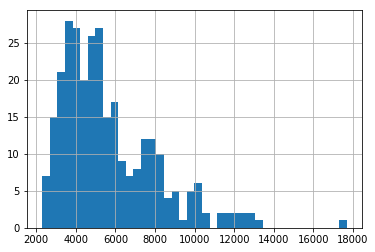

In [62]:
## Graph of salary distribution
result1.hist(bins=40)
plt.show()

# Explanatory Data Analysis

### Plot a graph between longitude and latitude

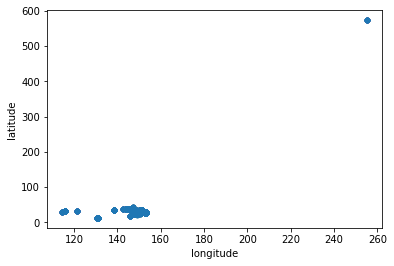

In [15]:
## Plot latitude and langitude in a graph to understand data better
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

According to data and graph it seems there is lot of extreme or outliner values in columns, so we filter it down and than plot a graph again.

In [16]:
df.latitude.sort_values(ascending =False)

531     573.00
622     573.00
8799    573.00
2130    573.00
2794    573.00
         ...  
3524     12.37
3510     12.37
6390     12.37
6403     12.37
2541     12.37
Name: latitude, Length: 12043, dtype: float64

In [17]:
df.longitude.sort_values(ascending = False)

8371     255.00
10164    255.00
2034     255.00
4465     255.00
2096     255.00
          ...  
3811     114.62
5359     114.62
3807     114.62
7826     114.62
11667    114.62
Name: longitude, Length: 12043, dtype: float64

In [18]:
sum(df['latitude'] > 500)    

123

In [19]:
sum(df['longitude'] > 200)

123

In [20]:
df_copy =df.copy()
df_copy = df_copy[
    (df.latitude < 500)
   & (df.longitude < 200)
     ]
df_copy.shape 

(11920, 28)

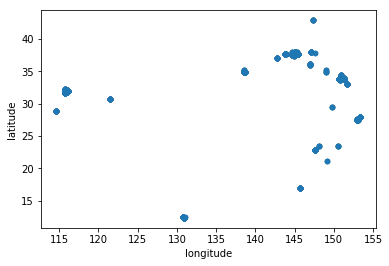

In [21]:
## Plot latitude and langitude in a graph to understand data better
df_copy.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

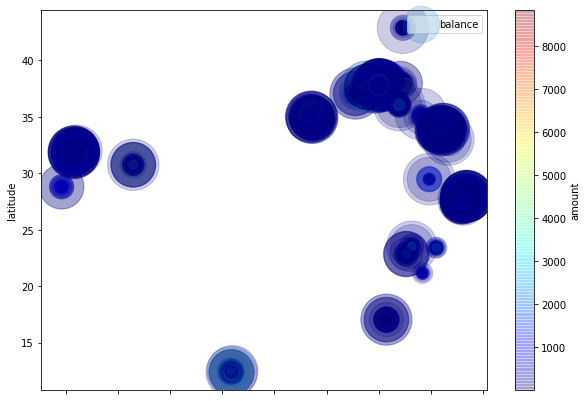

In [22]:
## Plot customer balance and amount graph according to customer location coordinates
df_copy.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2,
s=df["balance"]/100, label="balance", figsize=(10,7),
c="amount", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

### Drop columns which contains missing values and copy df in new cleaned dataframe.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             12043 non-null  object 
 1   card_present_flag  12043 non-null  float64
 2   bpay_biller_code   885 non-null    object 
 3   account            12043 non-null  object 
 4   currency           12043 non-null  object 
 5   long_lat           12043 non-null  object 
 6   txn_description    12043 non-null  object 
 7   merchant_id        7717 non-null   object 
 8   merchant_code      883 non-null    float64
 9   first_name         12043 non-null  object 
 10  balance            12043 non-null  float64
 11  date               12043 non-null  object 
 12  gender             12043 non-null  object 
 13  age                12043 non-null  int64  
 14  merchant_suburb    7717 non-null   object 
 15  merchant_state     7717 non-null   object 
 16  extraction         120

In [24]:
## Make a copy of dataframe and exclude some columns which contains null values
df_cleaned1 =df.drop(columns =['bpay_biller_code', 'merchant_id', 'merchant_code', 'merchant_suburb', 'merchant_state', 'merchant_long_lat'].copy())


In [25]:
## Check shape of cleaned dataframe
df_cleaned1.shape

(12043, 22)

In [26]:
df_cleaned1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             12043 non-null  object 
 1   card_present_flag  12043 non-null  float64
 2   account            12043 non-null  object 
 3   currency           12043 non-null  object 
 4   long_lat           12043 non-null  object 
 5   txn_description    12043 non-null  object 
 6   first_name         12043 non-null  object 
 7   balance            12043 non-null  float64
 8   date               12043 non-null  object 
 9   gender             12043 non-null  object 
 10  age                12043 non-null  int64  
 11  extraction         12043 non-null  object 
 12  amount             12043 non-null  float64
 13  transaction_id     12043 non-null  object 
 14  country            12043 non-null  object 
 15  customer_id        12043 non-null  object 
 16  movement           120

In [27]:
df_cleaned1.describe()

,card_present_flag,balance,age,amount,Month,Hour,longitude,latitude
count,12043.000000,12043.000000,12043.000000,12043.000000,12043.000000,12043.000000,12043.000000,12043.000000
mean,0.873536,14704.195553,30.582330,187.933588,9.011957,13.268621,143.648563,38.164347
std,0.332385,31503.722652,10.046343,592.599934,0.816511,5.777284,16.669352,54.622791
min,0.000000,0.240000,18.000000,0.100000,8.000000,0.000000,114.620000,12.370000
25%,1.000000,3158.585000,22.000000,16.000000,8.000000,9.000000,138.690000,30.750000
50%,1.000000,6432.010000,28.000000,29.000000,9.000000,13.000000,145.230000,33.890000
75%,1.000000,12465.945000,38.000000,53.655000,10.000000,18.000000,151.220000,37.700000
max,1.000000,267128.520000,78.000000,8835.980000,10.000000,23.000000,255.000000,573.000000


### Find correlation matrix of numeric variables and plot 

In [28]:
numeric_data = df_cleaned1.select_dtypes(exclude = [object])
numeric_data.shape

(12043, 8)

In [29]:
corr_matrix = numeric_data.corr()
corr_matrix

,card_present_flag,balance,age,amount,Month,Hour,longitude,latitude
card_present_flag,1.000000,0.037971,0.014023,0.094486,0.001594,-0.012623,-0.009548,0.003095
balance,0.037971,1.000000,0.199329,0.059178,0.099208,0.013898,-0.022436,-0.014786
age,0.014023,0.199329,1.000000,0.029980,0.009923,-0.000568,0.031728,-0.068866
amount,0.094486,0.059178,0.029980,1.000000,0.007860,0.032348,-0.000677,0.015175
Month,0.001594,0.099208,0.009923,0.007860,1.000000,0.006889,-0.002685,-0.021414
Hour,-0.012623,0.013898,-0.000568,0.032348,0.006889,1.000000,0.005114,0.014582
longitude,-0.009548,-0.022436,0.031728,-0.000677,-0.002685,0.005114,1.000000,0.682094
latitude,0.003095,-0.014786,-0.068866,0.015175,-0.021414,0.014582,0.682094,1.000000


#### Plot correlation matrix for better understanding and visualization

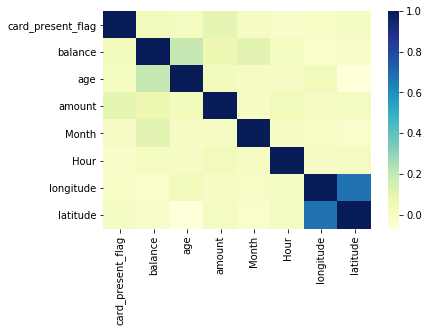

In [30]:
sns.heatmap(corr_matrix, cmap="YlGnBu")
plt.show()

### Plot histogram of all numeric variables for understanding data.

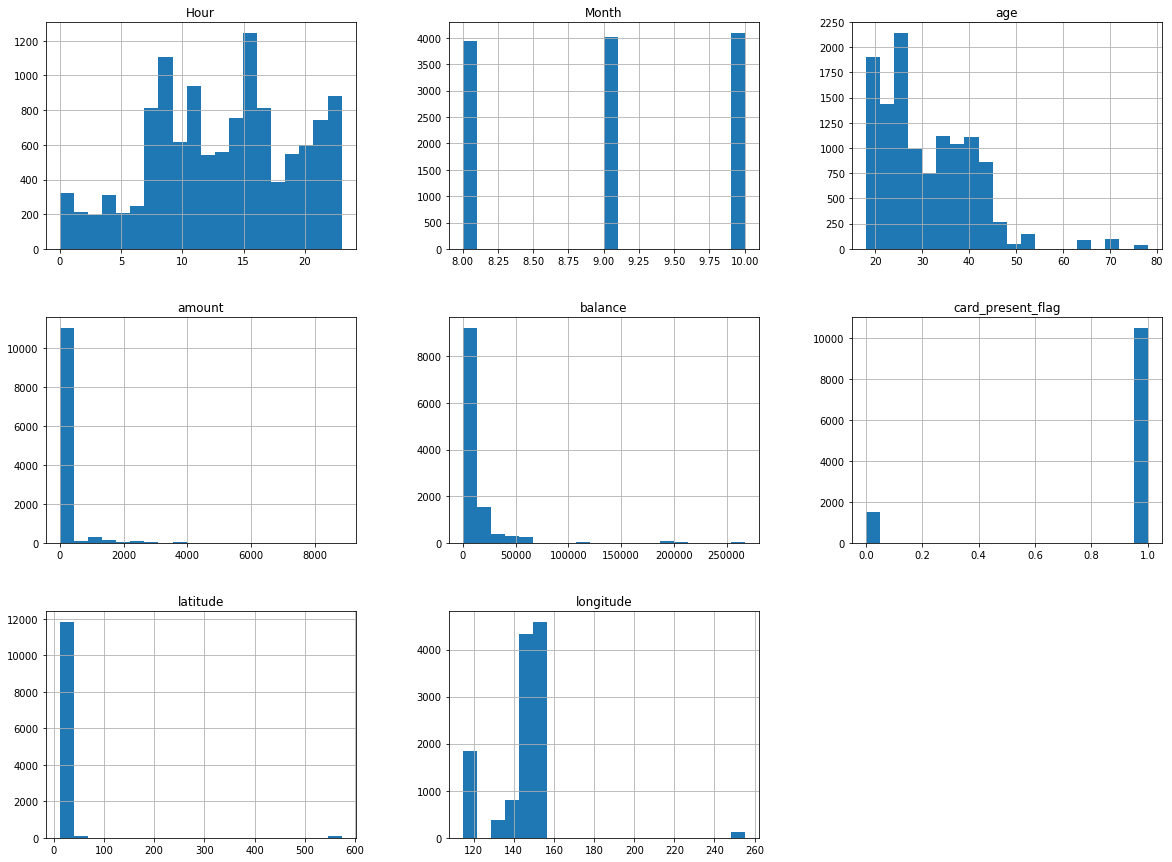

In [31]:
df_cleaned1.hist(bins=20, figsize=(20,15))
plt.show()

#### Box plot between merchant_state and balance of customers

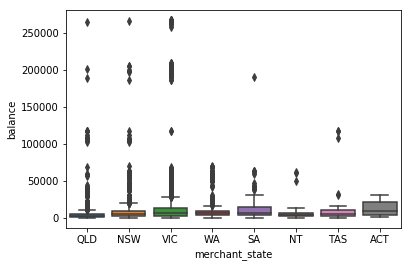

In [32]:
sns.boxplot(x='merchant_state', y='balance', data=df)
plt.show()

#### Box plot between merchant_state and transaction amount

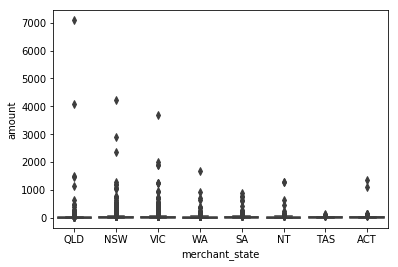

In [33]:
sns.boxplot(x='merchant_state', y='amount', data=df)
plt.show()

#### Scatter plot of Balance vs Age variable

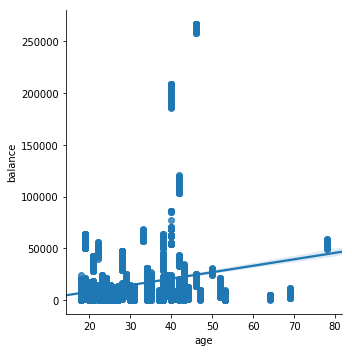

In [34]:
sns.lmplot(x='age', y='balance', data= df)
plt.show()

#### Box Whiskers & histogram plot of 'balance' variable

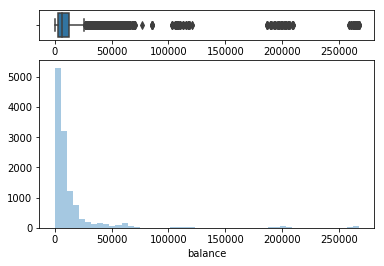

In [35]:
## Box whiskers plot & histogram on the same window 
## Split the plotting window into 2 parts

f, (ax_box, ax_hist)= plt.subplots(2, gridspec_kw={"height_ratios": (.15, .85)})
## Add and create  box plot
sns.boxplot(df_cleaned1["balance"], ax=ax_box)

sns.distplot(df_cleaned1["balance"], ax=ax_hist, kde=False)
plt.show()

#### Box Whiskers & histogram plot of 'amount' variable

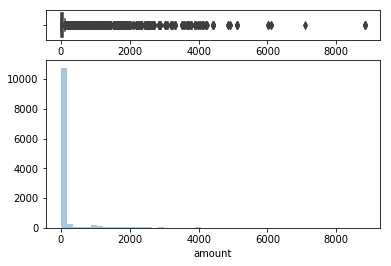

In [36]:
## Box whiskers plot & histogram on the same window 
## Split the plotting window into 2 parts

f, (ax_box, ax_hist)= plt.subplots(2, gridspec_kw={"height_ratios": (.15, .85)})
## Add and create  box plot
sns.boxplot(df_cleaned1["amount"], ax=ax_box)

sns.distplot(df_cleaned1["amount"], ax=ax_hist, kde=False)
plt.show()

#### Regplot between amount and balance of customers

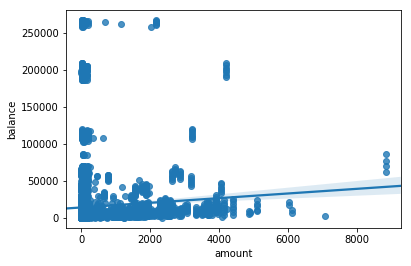

In [37]:
sns.regplot(x='amount', y='balance', scatter=True, data=df_cleaned1, fit_reg=True)
plt.show()

#### Box and whiskers plot between gender and balance variable.

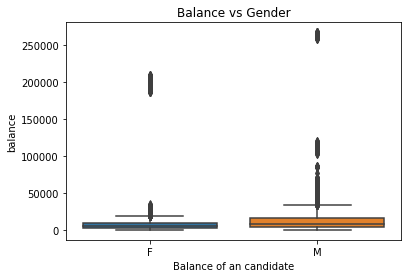

In [38]:
sns.boxplot(x='gender', y = 'balance', data=df_cleaned1)
plt.title("Balance vs Gender")
plt.xlabel("Gender of an candidate")
plt.xlabel("Balance of an candidate")
plt.show()

#### Bar Chart - Frequency Distribution of 'day' variable

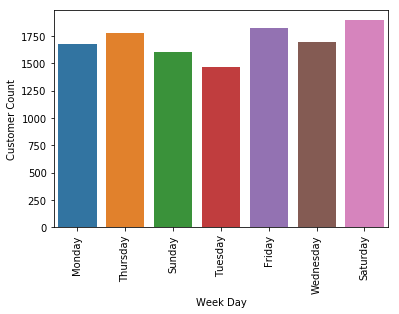

In [39]:
sns.countplot(x='day', data=df_copy)
plt.xticks(rotation = 'vertical')
plt.xlabel("Week Day")
plt.ylabel("Customer Count")
plt.show()

#### Box & whiskers plot between 'week_day' and 'amounnt'

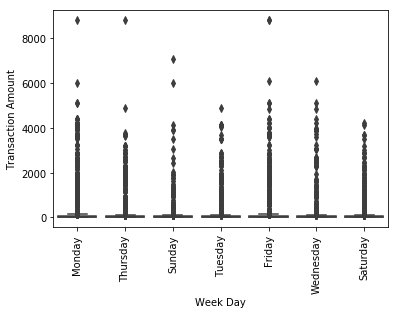

In [40]:
sns.boxplot(x='day', y='amount', data=df_copy)
plt.xlabel('Week Day')
plt.ylabel('Transaction Amount')
plt.xticks(rotation='vertical')
plt.show()

#### Bar Chart - Frequency Distribution of 'month_number' variable

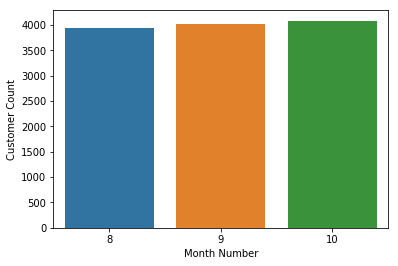

In [41]:
sns.countplot(x='Month', data=df_cleaned1)
plt.xlabel("Month Number")
plt.ylabel("Customer Count")
plt.show()

#### Box & whiskers plot between 'month_number' and 'amounnt'

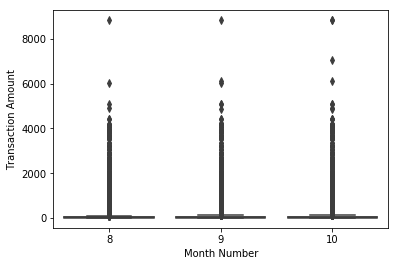

In [42]:
sns.boxplot(x='Month', y='amount', data=df_cleaned1)
plt.xlabel('Month Number')
plt.ylabel('Transaction Amount')
plt.show()

#### Box & whiskers plot between 'month_number' and 'balance'

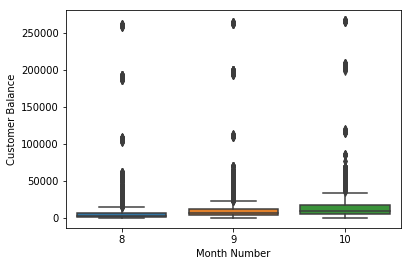

In [43]:
sns.boxplot(x='Month', y='balance', data=df_cleaned1)
plt.xlabel('Month Number')
plt.ylabel('Customer Balance')
plt.show()

#### Frequency Distribution of 'status' varible

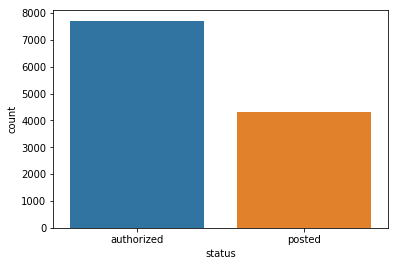

In [44]:
sns.countplot(x='status', data=df_cleaned1)
plt.show()

#### Box & whiskers plot between 'status' and 'balance' variable

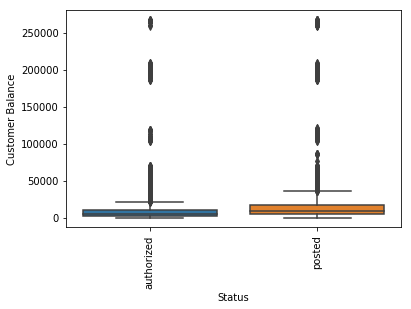

In [45]:
sns.boxplot(x='status', y='balance', data=df_cleaned1)
plt.xlabel('Status')
plt.ylabel('Customer Balance')
plt.xticks(rotation='vertical')
plt.show()

#### Box & whiskers plot between 'status' and 'amount' variable

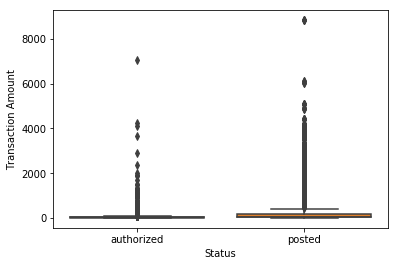

In [46]:
sns.boxplot(x='status', y='amount', data=df_cleaned1)
plt.xlabel('Status')
plt.ylabel('Transaction Amount')
plt.show()

### 24-hour Time and transaction Analysis

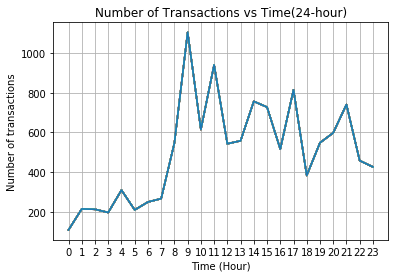

In [47]:
hours = [hour for hour, df in df_cleaned1.groupby('Hour')]

plt.plot(hours, df_cleaned1.groupby(["Hour"]).count())
##all_data_my.groupby(["Hour"]).count()

plt.xticks(hours)
plt.grid()
plt.ylabel("Number of transactions")
plt.xlabel("Time (Hour)")
plt.title("Number of Transactions vs Time(24-hour)")
plt.show()

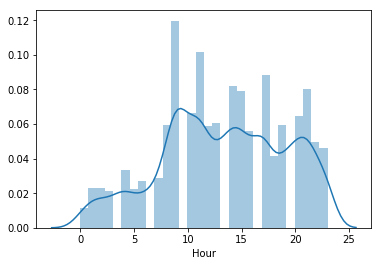

In [48]:
sns.distplot(df_cleaned1['Hour'])

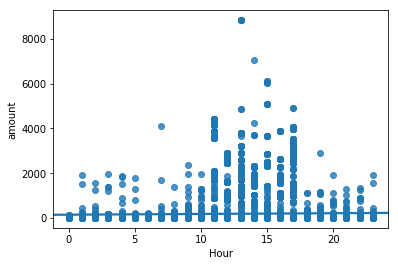

In [49]:
## Amount vs hour of customers
sns.regplot(x="Hour", y='amount', scatter=True, data=df_cleaned1)
plt.show()

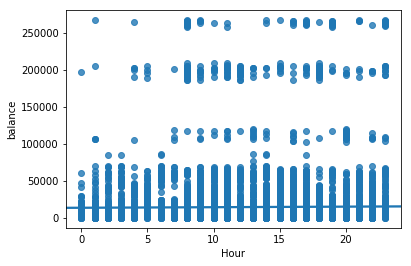

In [50]:
## time vs balance of customers
sns.regplot(x="Hour", y='balance', scatter=True, data=df_cleaned1)
plt.show()

### Plot graph between amount and hour with transaction description

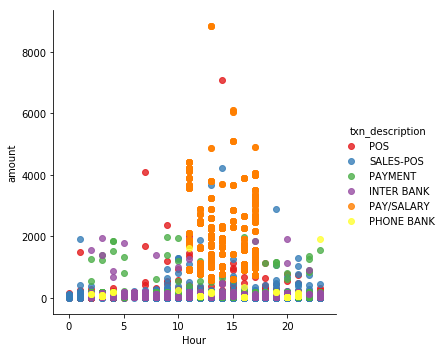

In [51]:
## Scatter plot of Price vs Age by FuelType
## Using hue parameter, including another variable to show the fuel types categories with different colors

sns.lmplot(x='Hour', y='amount', data= df_cleaned1, fit_reg=False, hue ='txn_description', legend=True, palette="Set1")

### Pairwise Plot :- Used to plot relationship in a dataset

##### Creates scatterplots for join relationship and histogram for univariate distributions 

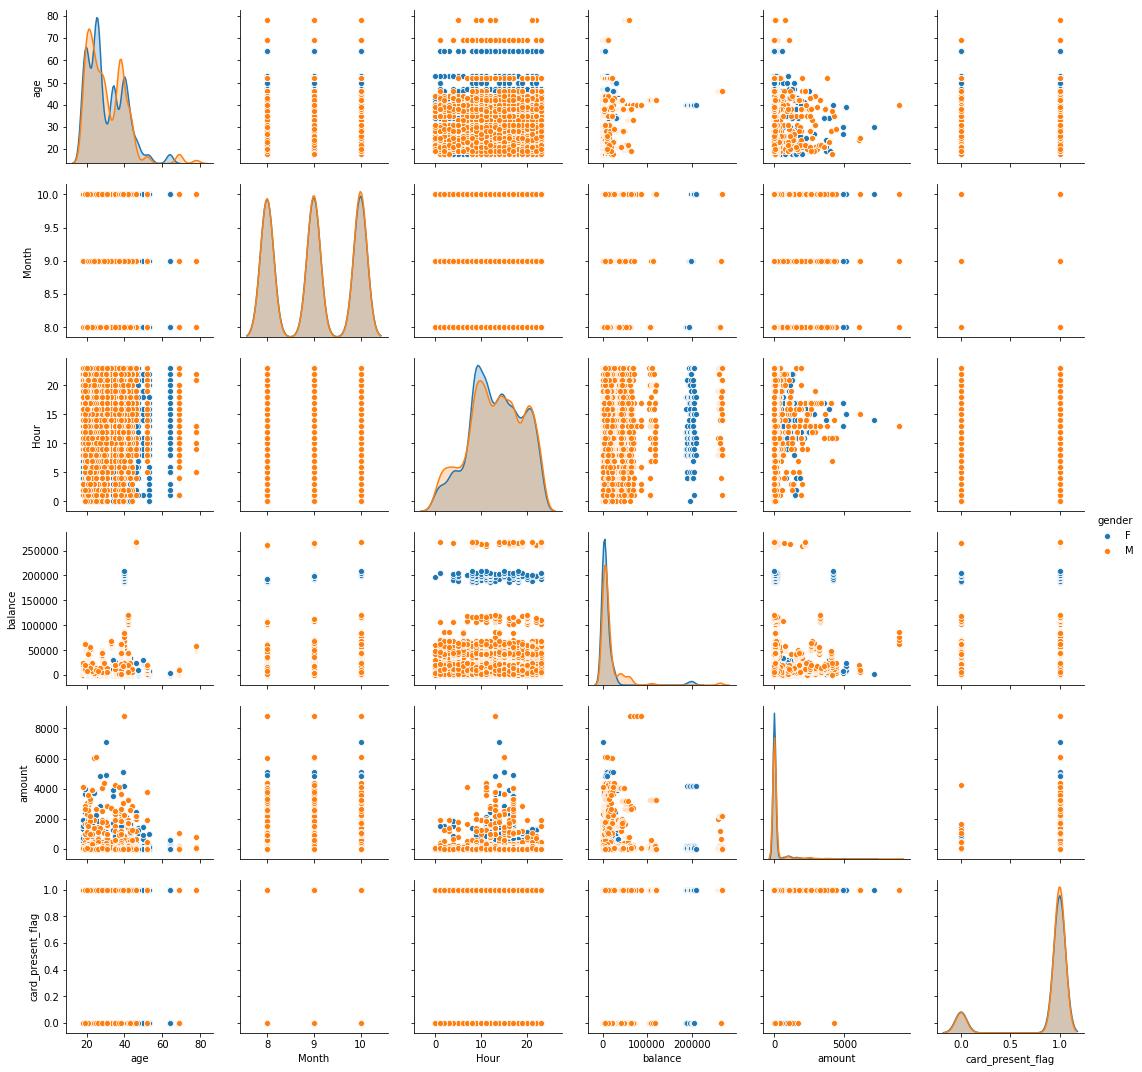

In [52]:
## Pair-plot of 'gender' variable with other variables
sns.pairplot(df_cleaned1, hue="gender", vars=['age', 'Month','Hour','balance','amount','card_present_flag'])

In [66]:
grouped = df['Month'].groupby(df['account'])
grouped.head()

0        8
1        8
2        8
3        8
4        8
        ..
1746     8
1789     8
1876     8
7309     9
8056    10
Name: Month, Length: 500, dtype: int32

In [68]:
grouped1 = df['amount'].groupby(df['account'])
grouped1.head()

0         16.25
1         14.19
2          6.42
3         40.90
4          3.25
         ...   
1746       8.75
1789     195.00
1876    2647.38
7309    4863.62
8056      20.00
Name: amount, Length: 500, dtype: float64

In [75]:
means = df['Month'].groupby([df['account'], df['amount']]).mean()
means

account         amount 
ACC-1037050564  3.71        9.000000
                3.88        8.000000
                3.92       10.000000
                5.09        8.000000
                5.89        8.000000
                             ...    
ACC-966140392   247.66      8.000000
                355.00     10.000000
                425.32      9.000000
                559.33      8.000000
                2572.91     8.857143
Name: Month, Length: 8194, dtype: float64

# Model Development

#### Now, build a Linear Regression and Random Forest Model on omitted dataframe.


In [77]:
## Drop in-significant columns from dataframe
df_omit = df_cleaned1.copy()
df_omit.drop(columns=['currency','customer_id','transaction_id','date','first_name','extraction','long_lat','country'], axis=1, inplace=True)
df_omit.shape

(12043, 14)

In [79]:
df_omit.drop(columns=['longitude', 'latitude','status','card_present_flag','Month','Hour'], axis=1, inplace=True)

In [80]:
df_omit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   account          12043 non-null  object 
 1   txn_description  12043 non-null  object 
 2   balance          12043 non-null  float64
 3   gender           12043 non-null  object 
 4   age              12043 non-null  int64  
 5   amount           12043 non-null  float64
 6   movement         12043 non-null  object 
 7   day              12043 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 517.5+ KB


In [81]:
## Converting categorical variables to dummy variables
df_omitted=pd.get_dummies(df_omit, drop_first=True)
df_omitted.shape

(12043, 115)

#### Import necessary libraries for model development

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

### MODEL BUILDING WITH OMITTED DATA

In [83]:
## Separating input and output features
x1 = df_omitted.drop(['amount'], axis='columns', inplace=False)
y1 = df_omitted['amount']

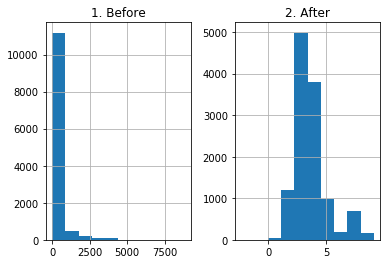

In [84]:
## Plotting the variable price and log of price
prices =pd.DataFrame({"1. Before":y1, "2. After":np.log(y1)})
prices.hist()
plt.show()

In [85]:
## Transform price as a logarithmic value
y1 =np.log(y1)

#### Splitting data into test and train to fit model & predict. Train set contains 70% data because test_size =0.3 and random state is a predefined algorithm its called pseudo random  number generator 

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state = 3)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(8430, 114) (3613, 114) (8430,) (3613,)


### BASELINE MODEL FOR OMITTED DATA

##### WE are making a base model by using test data mean value. This is to set a benchmark and to compare with our regression model.

In [87]:
## Finding the mean for test data value
base_pred =np.mean(y_test)
print(base_pred)

3.6303309597991706


In [88]:
## Representing some value till length of test data
base_pred = np.repeat(base_pred, len(y_test))

In [89]:
## Finding the RMSE(Root Mean Squared Error)
## RMSE computes the difference between the test value and the predicted value and squared them and divides them by number of samples.

base_root_mean_square_error = np.sqrt(mean_squared_error(y_test, base_pred))
print(base_root_mean_square_error)

1.3939115200445023


### LINEAR REGRESSION WITH OMITTED DATA

In [90]:
## Setting intercept as true
lgr = LinearRegression(fit_intercept =True)

In [91]:
## MODEL
model_lin1 = lgr.fit(x_train, y_train)

In [92]:
## Predicting model on test set
salary_predictions_lin1 = lgr.predict(x_test)

In [93]:
## Computing MSE and RMSE
lin_mse1 = mean_squared_error(y_test, salary_predictions_lin1)
lin_rmse1 = np.sqrt(lin_mse1)
print(lin_rmse1)

0.8037403049416882


Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are.

In [94]:
## R squared value
r2_lin_test1 = model_lin1.score(x_test, y_test)
r2_lin_train1 = model_lin1.score(x_train, y_train)
print(r2_lin_test1, r2_lin_train1)

0.6675234036343576 0.6838217206977606


count    3613.000000
mean        0.018025
std         0.803649
min        -5.459432
25%        -0.486612
50%        -0.071130
75%         0.409078
max         5.072414
Name: amount, dtype: float64

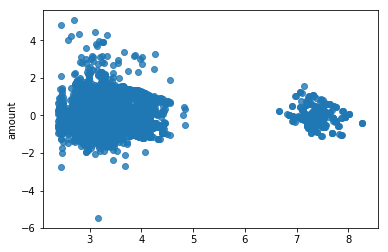

In [95]:
## Regression diagnostics :- Resident plot analysis
## It is differnce test data and your prediction. It is just difference between actual & predicted value.
residuals1 = y_test - salary_predictions_lin1
sns.regplot(x = salary_predictions_lin1, y=residuals1, scatter=True, fit_reg=False, data=df_omitted)
residuals1.describe()

### RANDOM FOREST with Omitted Data

In [96]:
## MODEL PARAMETERS
rf = RandomForestRegressor(n_estimators = 100, max_features='auto', max_depth=100, min_samples_split=10, min_samples_leaf=4, random_state=1)

In [97]:
## MODEL
model_rf1 =rf.fit(x_train, y_train)

In [98]:
## Predicting model on test set
salary_predictions_rf1 = rf.predict(x_test)

In [99]:
## Computing MSE and RSME
rf_mse1 = mean_squared_error(y_test, salary_predictions_rf1)
rf_rmse1 = np.sqrt(rf_mse1)
print(rf_rmse1)

0.7954859967826822


In [100]:
## R Squared value
r2_rf_test1 = model_rf1.score(x_test, y_test)
r2_rf_train1 = model_rf1.score(x_train, y_train)
print(r2_rf_test1, r2_rf_train1)

0.674317319862167 0.8101276294548814
